<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [50]:
import matplotlib.pyplot as plot
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

import statistics
from collections import Counter

In [51]:
def describe(data,column):
    x = data[column]
    c = x.count()
    s = x.unique().size
    m = statistics.mode(x)
    t = Counter(x)[m]
    n = x.isna().sum()
    e = numpy.where(x.map(lambda v: v == ''))[0].size # empty values
    z = numpy.where(x.map(lambda v: v == 0))[0].size # empty values
    print(f'Hay {c} elementos.')
    print(f'Hay {s} elementos únicos.')
    print(f'El elemento mas frecuente es {m} y ocurre {t} veces.')
    print(f"Hay {n} elementos nulos.")
    print(f"Hay {e} elementos vacíos.")
    print(f"Hay {z} elementos con ceros.")

In [119]:
def remove_outlier(df_in, col_name, iqr_factor):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

In [52]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [53]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [54]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [55]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
url = 'cleansed_listings_dec18.csv'
airbnb_df = pandas.read_csv(url,usecols=interesting_cols,low_memory=False)

In [56]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [57]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

# 1

Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades

In [58]:
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [59]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Feature Suburb

Hay 13580 elementos.
Hay 314 elementos únicos.
El elemento mas frecuente es Reservoir y ocurre 359 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='Suburb', ylabel='Count'>

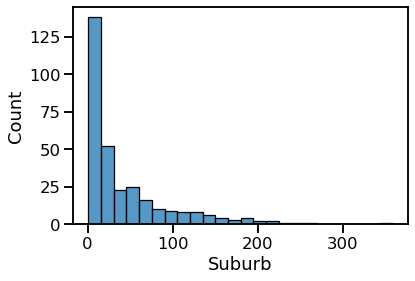

In [60]:
describe(melb_df,'Suburb')
vc = melb_df.Suburb.value_counts()
seaborn.histplot(vc)

Se observa que los datos de suburbios/barrios tiene outliers, hay suburbios mas predominantes.

### Feature Address

In [61]:
describe(melb_df,'Address')

Hay 13580 elementos.
Hay 13378 elementos únicos.
El elemento mas frecuente es 5 Charles St y ocurre 3 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


### Feature Rooms

Hay 13580 elementos.
Hay 9 elementos únicos.
El elemento mas frecuente es 3 y ocurre 5881 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='Rooms'>

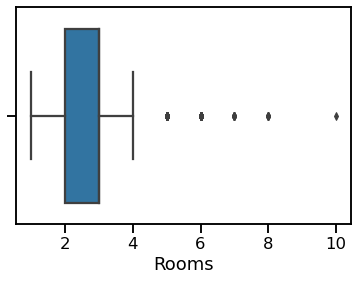

In [62]:
describe(melb_df,'Rooms')
seaborn.boxplot(data=melb_df, x='Rooms')

### Feature Type

Hay 13580 elementos.
Hay 3 elementos únicos.
El elemento mas frecuente es h y ocurre 9449 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='Type', ylabel='Count'>

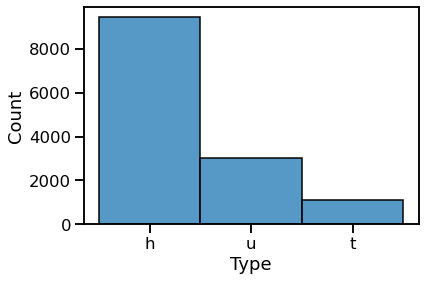

In [63]:
describe(melb_df,'Type')
seaborn.histplot(data=melb_df, x='Type')

### Feature Price

Hay 13580 elementos.
Hay 2204 elementos únicos.
El elemento mas frecuente es 1100000.0 y ocurre 113 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='Price'>

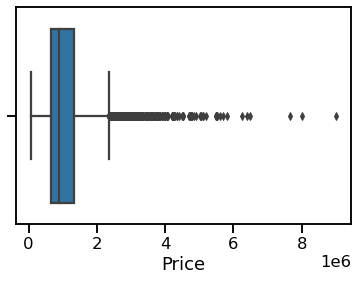

In [64]:
describe(melb_df,'Price')
seaborn.boxplot(data=melb_df, x='Price')

### Feature Method

Hay 13580 elementos.
Hay 5 elementos únicos.
El elemento mas frecuente es S y ocurre 9022 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='Method', ylabel='Count'>

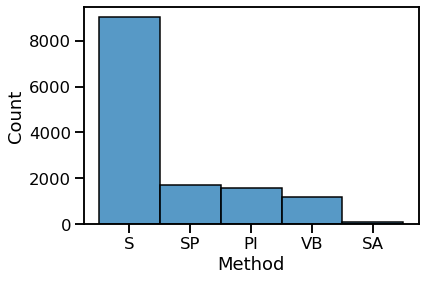

In [65]:
describe(melb_df,'Method')
seaborn.histplot(data=melb_df, x='Method')

### Feature SellerG

In [66]:
describe(melb_df,'SellerG')

Hay 13580 elementos.
Hay 268 elementos únicos.
El elemento mas frecuente es Nelson y ocurre 1565 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


### Feature Date

In [67]:
describe(melb_df,'Date')

Hay 13580 elementos.
Hay 58 elementos únicos.
El elemento mas frecuente es 27/05/2017 y ocurre 473 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


### Feature Distance

Hay 13580 elementos.
Hay 202 elementos únicos.
El elemento mas frecuente es 11.2 y ocurre 739 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 6 elementos con ceros.


<AxesSubplot:xlabel='Distance'>

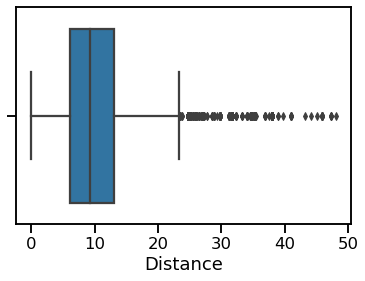

In [68]:
describe(melb_df,'Distance')
seaborn.boxplot(data=melb_df,x='Distance')

### Feature Postcode

In [70]:
describe(melb_df,'Postcode')

Hay 13580 elementos.
Hay 198 elementos únicos.
El elemento mas frecuente es 3073.0 y ocurre 359 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


### Feature Bedroom2

Hay 13580 elementos.
Hay 12 elementos únicos.
El elemento mas frecuente es 3.0 y ocurre 5896 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 16 elementos con ceros.


<AxesSubplot:xlabel='Bedroom2'>

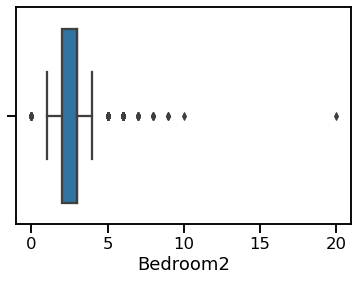

In [81]:
describe(melb_df,'Bedroom2')
seaborn.boxplot(data=melb_df,x='Bedroom2')

### Feature Bathroom

Hay 13580 elementos.
Hay 9 elementos únicos.
El elemento mas frecuente es 1.0 y ocurre 7512 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 34 elementos con ceros.


<AxesSubplot:xlabel='Bathroom'>

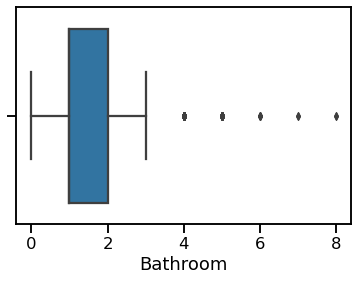

In [80]:
describe(melb_df,'Bathroom')
seaborn.boxplot(data=melb_df,x='Bathroom')

### Feature Car

Hay 13518 elementos.
Hay 12 elementos únicos.
El elemento mas frecuente es 2.0 y ocurre 5591 veces.
Hay 62 elementos nulos.
Hay 0 elementos vacíos.
Hay 1026 elementos con ceros.


<AxesSubplot:xlabel='Car'>

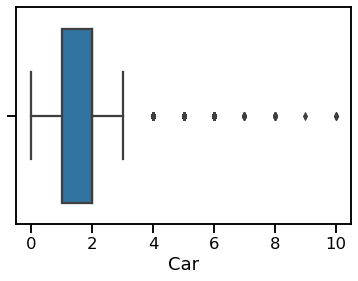

In [79]:
describe(melb_df,'Car')
seaborn.boxplot(data=melb_df,x='Car')

### Feature Landsize

Hay 13580 elementos.
Hay 1448 elementos únicos.
El elemento mas frecuente es 0.0 y ocurre 1939 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 1939 elementos con ceros.


<AxesSubplot:xlabel='Landsize'>

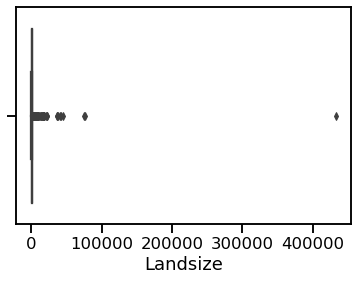

In [78]:
describe(melb_df,'Landsize')
seaborn.boxplot(data=melb_df,x='Landsize')

### Feature BuildingArea

Hay 7130 elementos.
Hay 603 elementos únicos.
El elemento mas frecuente es 120.0 y ocurre 114 veces.
Hay 6450 elementos nulos.
Hay 0 elementos vacíos.
Hay 17 elementos con ceros.


<AxesSubplot:xlabel='BuildingArea'>

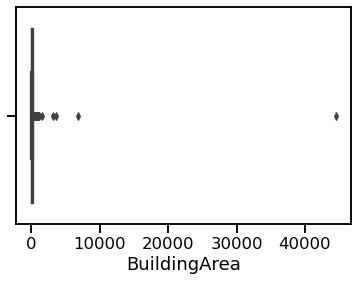

In [82]:
describe(melb_df,'BuildingArea')
seaborn.boxplot(data=melb_df,x='BuildingArea')

### Feature YearBuilt

Hay 8205 elementos.
Hay 145 elementos únicos.
El elemento mas frecuente es 1970.0 y ocurre 866 veces.
Hay 5375 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='YearBuilt'>

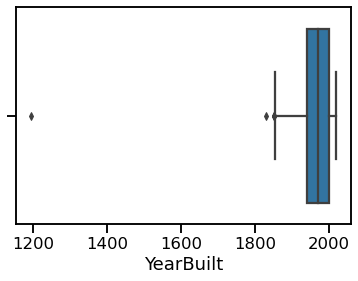

In [83]:
describe(melb_df,'YearBuilt')
seaborn.boxplot(data=melb_df,x='YearBuilt')

### Feature CouncilArea

In [117]:
describe(melb_df,'CouncilArea')

Hay 12211 elementos.
Hay 34 elementos únicos.
El elemento mas frecuente es nan y ocurre 1369 veces.
Hay 1369 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


### Feature Latitude

In [109]:
describe(melb_df,'Lattitude')

Hay 13580 elementos.
Hay 6503 elementos únicos.
El elemento mas frecuente es -37.8361 y ocurre 21 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


### Feature Longitude

In [112]:
describe(melb_df,'Longtitude')

Hay 13580 elementos.
Hay 7063 elementos únicos.
El elemento mas frecuente es 144.9966 y ocurre 17 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


### Feature Region Name

Hay 13580 elementos.
Hay 8 elementos únicos.
El elemento mas frecuente es Southern Metropolitan y ocurre 4695 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


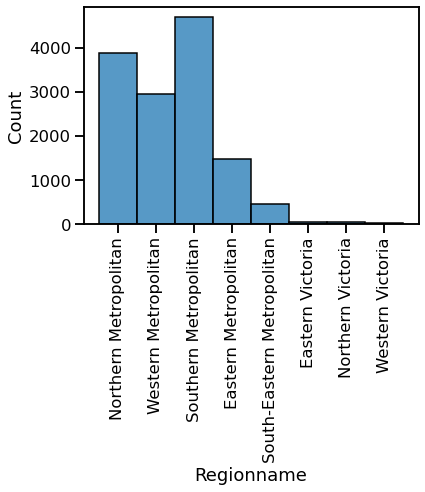

In [115]:
describe(melb_df,'Regionname')
seaborn.histplot(data=melb_df,x='Regionname')
plot.xticks(rotation=90)
plot.show()

In [116]:
describe(melb_df,'Propertycount')

Hay 13580 elementos.
Hay 311 elementos únicos.
El elemento mas frecuente es 21650.0 y ocurre 359 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


In [128]:
#removemos los outliers de las variables price, rooms, bathroom y car
iqr_factor = 1.5
df_main_inliers, df_main_outliers = remove_outlier(melb_df, "Price", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "Rooms", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "Bathroom", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "Car", iqr_factor)
p = (len(df_main_inliers) / len(melb_df)) * 100
print(f'Después de remover outlier con IQR mantenemos un porcentaje del {p}% sobre el dataset original')

Después de remover outlier con IQR mantenemos un porcentaje del 87.44477172312224% sobre el dataset original


Hay 11875 elementos.
Hay 1890 elementos únicos.
El elemento mas frecuente es 650000.0 y ocurre 101 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='Price'>

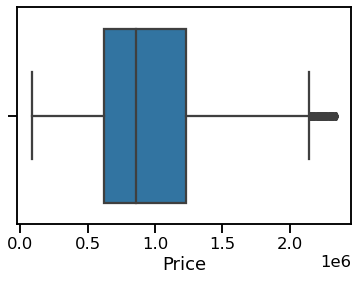

In [129]:
describe(df_main_inliers,'Price')
seaborn.boxplot(data=df_main_inliers, x='Price')

Hay 11875 elementos.
Hay 4 elementos únicos.
El elemento mas frecuente es 3 y ocurre 5459 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 0 elementos con ceros.


<AxesSubplot:xlabel='Rooms'>

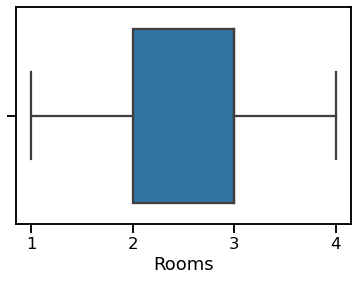

In [131]:
describe(df_main_inliers,'Rooms')
seaborn.boxplot(data=df_main_inliers, x='Rooms')

Hay 11875 elementos.
Hay 4 elementos únicos.
El elemento mas frecuente es 1.0 y ocurre 7154 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 34 elementos con ceros.


<AxesSubplot:xlabel='Bathroom'>

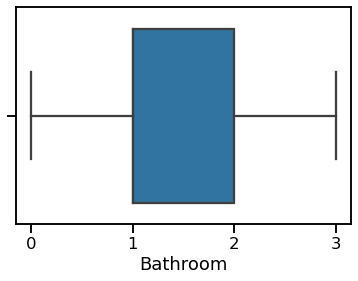

In [132]:
describe(df_main_inliers,'Bathroom')
seaborn.boxplot(data=df_main_inliers, x='Bathroom')

Hay 11875 elementos.
Hay 4 elementos únicos.
El elemento mas frecuente es 1.0 y ocurre 5385 veces.
Hay 0 elementos nulos.
Hay 0 elementos vacíos.
Hay 986 elementos con ceros.


<AxesSubplot:xlabel='Car'>

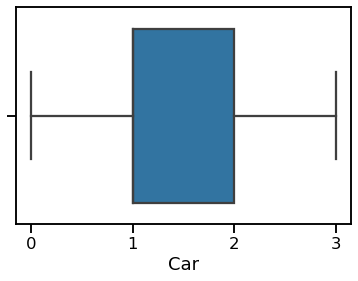

In [133]:
describe(df_main_inliers,'Car')
seaborn.boxplot(data=df_main_inliers, x='Car')

### Exploración

In [134]:
df_main_inliers.describe().round(2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11875.00,11875.00,11875.00,11875.00,11875.00,11875.00,11875.00,11875.00,6206.00,7183.00,11875.00,11875.00,11875.00
mean,2.77,956033.49,10.02,3103.13,2.75,1.43,1.43,498.11,132.08,1966.07,-37.81,144.99,7481.26
std,0.81,440882.08,5.85,89.65,0.83,0.57,0.72,1502.63,120.70,35.83,0.08,0.10,4429.93
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1830.00,-38.18,144.43,249.00
25%,2.00,622500.00,6.10,3044.00,2.00,1.00,1.00,154.00,88.00,1950.00,-37.86,144.93,4294.00
50%,3.00,860000.00,9.20,3081.00,3.00,1.00,1.00,368.00,119.00,1970.00,-37.80,145.00,6567.00
75%,3.00,1233000.00,13.00,3147.00,3.00,2.00,2.00,622.00,157.00,2000.00,-37.76,145.05,10331.00
max,4.00,2345000.00,47.30,3977.00,20.00,3.00,3.00,76000.00,6791.00,2018.00,-37.41,145.48,21650.00


A simple vista, podemoms notar que en la fila count, hay variables con menos informacion que el resto.

### Reconocimiento de datos faltantes

In [135]:
df_main_inliers.info() # me dice cuantos no-null tengo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11875 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         11875 non-null  object 
 1   Address        11875 non-null  object 
 2   Rooms          11875 non-null  int64  
 3   Type           11875 non-null  object 
 4   Price          11875 non-null  float64
 5   Method         11875 non-null  object 
 6   SellerG        11875 non-null  object 
 7   Date           11875 non-null  object 
 8   Distance       11875 non-null  float64
 9   Postcode       11875 non-null  float64
 10  Bedroom2       11875 non-null  float64
 11  Bathroom       11875 non-null  float64
 12  Car            11875 non-null  float64
 13  Landsize       11875 non-null  float64
 14  BuildingArea   6206 non-null   float64
 15  YearBuilt      7183 non-null   float64
 16  CouncilArea    10802 non-null  object 
 17  Lattitude      11875 non-null  float64
 18  Longti

### Detección las variables con valor cero del dataset

In [145]:
def colsWithZero(data):
    print("Columnas con zeros\n")
    cols = data[data == 0].count(axis=0)
    print(cols[cols > 0])

In [146]:
colsWithZero(df_main_inliers)

Columnas con zeros

Distance           6
Bedroom2          15
Car              986
Landsize        1919
BuildingArea      11
dtype: int64


Son estos ceros valores posibles de la variable o datos faltantes codificados asi?

### Posibilidades

 - Distancia al centro: es posible que sea cero, ya que puede estar ubicado en el centro
 - Bedroom2: pueden ser datos faltantes que por defecto tengan 1 habitacion, o ser monohambientes
 - Bathroom: son datos faltantes, no es posible que no tengan banios. Por defecto puede ser 1 banio
 - Garage: puede darse que no tenga garage o lugar de estacionamiento.
 - Landsize: generalmeente si es un dpto no dice el tamanio del terreno
 - BuildingArea: no puede tener ceros, son datos faltantes.


### Analizando valores nulos en conjunto con variables que tienen valores cero, podemos decir que:

- Distance: tiene 6 datos = 0.
- Bedroom2: tiene 16 datos = 0.
- Bathroom: tiene 34 datos = 0. 
- Car: de total contado 1021 son 0, ademas 62 son nulos.
- Landsize: tiene 1937 datos = 0.
- BuildingArea: del total contado 16 son 0, ademas 6374 son nulos (48% de la informacion)
- YearBuilt; 5308 son nulos. (40% de la informmacion)
- CouncilArea: 1348 son nulos.


### Acciones a implementar

### 1

Reemplazar los datos 0 en Bathroom por 1

In [147]:
df_main_inliers.loc[df_main_inliers.Bathroom<1,'Bathroom']=1
colsWithZero(df_main_inliers)

Columnas con zeros

Distance           6
Bedroom2          15
Car              986
Landsize        1919
BuildingArea      11
dtype: int64


### 2

Sobre la variable CAR, reemplazamos los datos nulos con 0

In [ ]:
df_main_inliers.fillna({'Car':0}, inplace=True)
df_main_inliers.info()

### 3

Analizamos la variable Bedroom vs Rooms

In [ ]:
Bedroom2 = df_main_inliers.Bedroom2
Rooms = df_main_inliers.Rooms
pandas.crosstab(Bedroom2,Rooms)

La variable Rooms es mucho mas informativa que la variable Bedroom2. Por esto decidimos sacar la variable Bedroom2

In [ ]:
df_main_inliers.drop(['Bedroom2'], axis=1, inplace=True)

### 4

Considerando que BuildingArea y YearBuilt tienen muchos datos faltantes realizamos el siguiente analisis. 


In [ ]:
missing_values_count = df_main_inliers.isna().sum()
missing_values_count

In [ ]:
import missingno as msno
msno.bar(df_main_inliers,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
msno.matrix(df_main_inliers,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

In [ ]:
#Debido a que las variables tienen muchos datos faltantes se decide retirarlas del df ya que no aportan informacion
#al analisis.
df_main_inliers=df_main_inliers.drop(['BuildingArea'], axis=1)
df_main_inliers=df_main_inliers.drop(['YearBuilt'], axis=1)

df_main_inliers

# 2

Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.

In [ ]:
columnas_numericas = df_main_inliers.select_dtypes(['int', 'float']).columns

### Gráfico de probabilidad:
Cuanto más se parezca nuestra gráfica a una línea de 45 grados, más normal será utilizando el metodo qqplot.

In [ ]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(df_main_inliers[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    
    plt.show()

    
for num_col in columnas_numericas:
    normalidad_variable_numerica(num_col)

### Histogramas:
Podemos crear un histograma para ver la distribución de las variables.

In [ ]:
fig, axs = plt.subplots(len(columnas_numericas), figsize=(10, 35))
for n, col in enumerate(columnas_numericas):
    df_main_inliers[col].hist(ax=axs[n],bins=50, label=col)
    axs[n].legend()
    

Con estos graficos podemos determinar que las variables price, distance, latitude y longitud tienden a una distribucion aproximadamente normal.

In [ ]:
df_main_inliers.columns

In [ ]:
selected_columns = ['Suburb', 'Rooms', 'Type','Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
        'CouncilArea','Propertycount']

df_filtered = df_main_inliers[selected_columns]

### Columnas no seleccionadas

- Address, Method, SeleerG, Date, Lattitude, Longitude, Regionname  : se descartan porque considero que no aportan informacion relevante o aportan informacion duplicada que se puede inferir de otra variable.

- Quitamos price porque es el target, no se usa para el procesamiento.


## 4

Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros


In [ ]:
df_filtered.Suburb.value_counts().tail(61)

In [ ]:
#agrupo todos las categorias que tengan una frecuencia menor a 5
suburb_replace=df_filtered.Suburb.value_counts().tail(61).index.tolist()
df_filtered.replace(to_replace=suburb_replace, value='others', inplace=True)

In [ ]:
df_filtered.Suburb.value_counts()
#corroboramos la frecuencia

In [ ]:
df_filtered['Type'].value_counts()
#no se modifica

In [ ]:
df_filtered.Postcode.value_counts()

In [ ]:
df_filtered.CouncilArea.value_counts()
#mismo analisis para esta variable

In [ ]:
#agrupo todos las categorias que tengan una frecuencia menor a 20
councilarea_replace=df_filtered.CouncilArea.value_counts().tail(5).index.tolist()
df_filtered.replace(to_replace=councilarea_replace, value='Other',inplace=True)
councilarea_replace
#remplazo por other

In [ ]:
df_filtered.CouncilArea.value_counts()

## 5

Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico. 

## 6

Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

## 7

Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [ ]:
airbnb_df.columns

In [ ]:
airbnb_df.zipcode.value_counts()[:5]
#hay que unificar el tipo de valor

In [ ]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
airbnb_df.zipcode.value_counts()
#observamos los datos con el tpo de valor unificado.

Antes de unir los conjuntos de datos, tenemos que asegurarnos de que tengamos suficientes registros en común como para agregar información relevantes.

In [ ]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, df_filtered.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(df_filtered.Postcode.unique()))
print("Common zipcodes", len(intersection))

# interseccion de conjuntos

In [ ]:
print('Records in Sales df with corresponding zipcode form Sales df',
      df_filtered.Postcode.isin(intersection).sum() / len(df_filtered))
print('Records in Airbnb df with corresponding zipcode form Airbnb df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

In [ ]:
columns_airbnb = ['zipcode', 'price']

airbnb_filtered = airbnb_df[columns_airbnb]
#solo adquirimos las columnas zipcode para realizar la union, y price para tener informacion de los precios por dia
#en dicha zona. No se toma weekly price ni monthly price ya que creemos que no aporta mayor informacion.


In [ ]:
#utilizo la funcion count y mean a price para agregarlo como variables
airbnb_2 = airbnb_filtered[columns_airbnb].groupby('zipcode')\
   .agg(airbnb_record_count=('price', 'count'),
    airbnb_price_day_mean=('price', 'mean'))\
   .reset_index()

In [ ]:
merged_sales_df = df_filtered.merge(
    airbnb_2, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df
#realizo el merge de los df

## 8

Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.

In [ ]:
#genero un array de los valores en formato str
array=df_filtered.Suburb.values
array_str_df=[]
for i in array:
    array_str_df.append(str(i))
array2=airbnb_df.suburb.values
array_str_airbnb=[]
for i in array2:
    array_str_airbnb.append(str(i))
    
#realizo la interseccion de arrays en formato str
import collections
def flatten(x):
    result = []
    for el in x:
        if isinstance(x, collections.Iterable) and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result
 
a = flatten(array_str_airbnb)
b = flatten(array_str_df)
common_elements = list(set(a).intersection(set(b)))


print("Airbnb unique suburb", len(airbnb_df.suburb.unique()))
print("Sales unique suburb", len(df_filtered.Suburb.unique()))
print("Common suburb", len(common_elements))
#se ve que la mayoria de los valores de sales estan en el de airbnb

In [ ]:

#genero un array de los valores en formato str
array=df_filtered.Suburb.values
array_str_df=[]
for i in array:
    array_str_df.append(str(i))
array2=airbnb_df.neighborhood.values
array_str_airbnb=[]
for i in array2:
    array_str_airbnb.append(str(i))
    
#realizo la interseccion de arrays en formato str
import collections
def flatten(x):
    result = []
    for el in x:
        if isinstance(x, collections.Iterable) and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result
 
a = flatten(array_str_airbnb)
b = flatten(array_str_df)
common_elements = list(set(a).intersection(set(b)))


print("Airbnb unique neighborhood", len(airbnb_df.neighborhood.unique()))
print("Sales unique suburb", len(df_filtered.Suburb.unique()))
print("Common suburb", len(common_elements))
#se ve que la mayoria de los valores de sales estan en el de airbnb

Analizamos las dos variables que se podrian utilizar para realizar la union, de las cuales observamos que las variables suburb y neighborhood del dataframe airbnb podria utilizarse para realizar el merge con la variable suburb de melb_df. 
Podriamos utilizar un join para unir los valores de neighboorhood con suburb para que incluya todos los valores de suburb y no solo los comunes.

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



In [ ]:
missing_values_count = merged_sales_df['CouncilArea'].isna().sum() 
missing_values_count

In [ ]:
merged_sales_df.isna().any().head(60)
#observamos los valores true en las variables que tienen valores nulos.

In [ ]:
from sklearn.impute import KNNImputer
import re

# Get CouncilArea & Suburb dummies
dummies_variables = merged_sales_df[['CouncilArea','Suburb']]
df_dummies = pandas.get_dummies(dummies_variables,dummy_na=True)

#borro las columnas generadas con nan. Se pone en las columnas correspondientes un nan y no un 0.
nan_df = df_dummies.loc[:, df_dummies.columns.str.endswith("_nan")]
pattern = "^([^_]*)_"
regex = re.compile(pattern)

for index in df_dummies.index:
    for col_nan in nan_df.columns:
        if df_dummies.loc[index,col_nan] == 1:
            col_id = regex.search(col_nan).group(1)
            targets = df_dummies.columns[df_dummies.columns.str.startswith(col_id+'_')]
            df_dummies.loc[index, targets] = np.nan
            
df_dummies.drop(df_dummies.columns[df_dummies.columns.str.endswith('_nan')], axis=1, inplace=True)

# Inputing by suburb
imputer = KNNImputer(n_neighbors=5)
df_dummies = pandas.DataFrame(imputer.fit_transform(df_dummies),columns = df_dummies.columns)

# Concat new dummies vars and drop unused columns
df = pandas.concat([merged_sales_df,df_dummies],axis=1)
df=df.drop(["CouncilArea"],axis=1)
df=df.drop(["Suburb"],axis=1)

In [ ]:
df.isna().any().head(60)
#se realizo la imputacion a council area utilizando suburb

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Get dummies for Type
new_dummies_variables = df[['Type']]
new_df_dummies = pandas.get_dummies(new_dummies_variables)

## Concat type dummies
new_df = pandas.concat([df,new_df_dummies],axis=1)
new_df = new_df.drop(['Type'],axis=1)

# Scalling
scaler = MinMaxScaler()
new_df = pandas.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns)

# Inputing rest of the missing values
imputer = KNNImputer(n_neighbors=5)
new_df = pandas.DataFrame(imputer.fit_transform(new_df),columns = new_df.columns)
new_df

In [ ]:
new_df.isna().any().head(60)
#No hay mas valores nulos en el df

Se elimina los dummies que comienzan con "suburb" ya que fueron utilizadas en la imputación de CouncilArea utilizando esta variable como variable de región.

También sacamos zipcode y postcode debido a que fueron utilizados para la realización del merge y no lo utilizaremos para predecir el precio.

In [ ]:
new_df.drop(new_df.columns[new_df.columns.str.startswith('Suburb_')], axis=1, inplace=True)

In [ ]:
new_df.drop(['zipcode','Postcode'] ,axis=1, inplace=True)

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
new_df.to_csv('Dataframe_melb.csv',index=False)

In [ ]:
new_df=pandas.read_csv("Dataframe_melb.csv")
new_df